# Просторова обробка зображень: поелемента обробка

У даній лабораторній роботі розглянуто наступні приклади поелементої обробки зображень:
1. Гістограма
2. Негативне зображення
3. Зміна контрасту
4. Степеневі перетворення
5. Еквалізація гістограми

### Імпортуємо необхдіні пакети та бібліотеки

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Гістограма

У даній лабораторній роботі для аналізу перетворень зображень використовуються гістограми цифрових зображент. Гістограма цифрового зображення з діапазоном значень інтенсивності [0, L-1] є дискретна функція:
$$\begin{eqnarray}
h(&r_{k}&) &=&&n_{k}&,  де
\end{eqnarray}$$

* $ r_{k} $ - k-ий рівень інтенсивності;
* $ n_{k} $ - число пікселів на зображенні.

Для визначення гістограми цифрового зображення використовується функція **calcHist**.

### Синтаксис функції
    hist = cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
Параметри:
* **images** - вхідне зображення;
* **channels** - індекс колірного каналу для якого необхідно визначити гістограму, задається у квадртних дужках (для чорно-білого зображення задається [0]);
* **mask** -  координати регіону інтересу для якого необхідно визначити гістограму (None - для всього зображення);
* **histSize** - число пікселів (обсяг вибірки);
* **ranges** - діапазон пікселів.

Зчитаємо та завантажимо вхідне чорно-біле зображення, визначимо та відобразимо зображення та його гістограму:

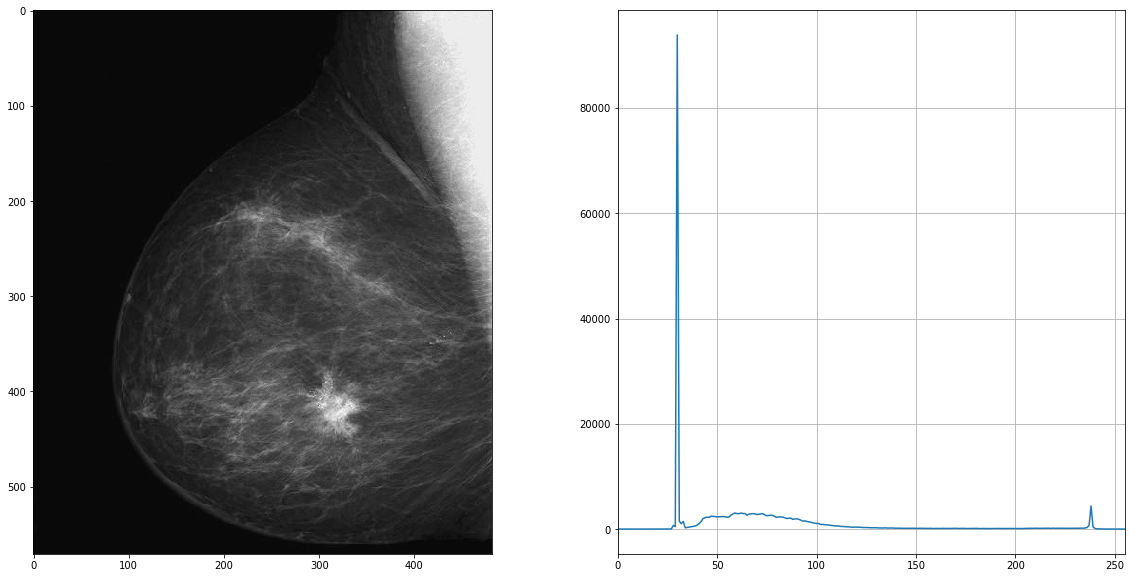

In [3]:
img = cv2.imread("./examples/Fig0304.tif", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img, cmap = 'gray');
plt.subplot(122)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist); plt.xlim([0, 255]); plt.grid(); plt.show();
plt.show();

### Перетворення зображення в негатив

Перетворення зображення у негатив зі значеннями інтенсивності пікселів в діапазоні [0, L-1] визначається наступним виразом:

$$\begin{eqnarray}
s &=& &L &-&1 &-&r
\end{eqnarray}$$

* s - значення інтенсивності піксела вихідного зображення;
* L - максимальне значення інтенсивності пікселя вхідного та вихідного зображення;
* r - значення інтенсивності піксела вхідного зображення.

Даний тип перетворення використовується для підсилення білих та сірих деталей на фоні темних областей зображення.

Реалізуємо дане перетворення за допомогою наступних операції:
1. доступу до окремих пікселів
2. доступу до групи пікселів

Визначимо параметри вхідного зображення:

In [4]:
height = img.shape[0] 
width = img.shape[1]
print(img.dtype)

uint8


Підготуємо пусте вихідне зображення - масив нулів із розміром тестового чороно-білого зображення.

In [5]:
neg_img = np.zeros(img.shape, dtype=np.uint8)

Згідно приведеної формули, поелементно визначимо інтенсивність пікселів вихідного зображення:

In [6]:
for row in range(height):
    for col in range(width):
        neg = np.iinfo('uint8').max - 1 - img[row][col]
        neg_img[row][col] = neg

Відобразимо вихідне зображення.

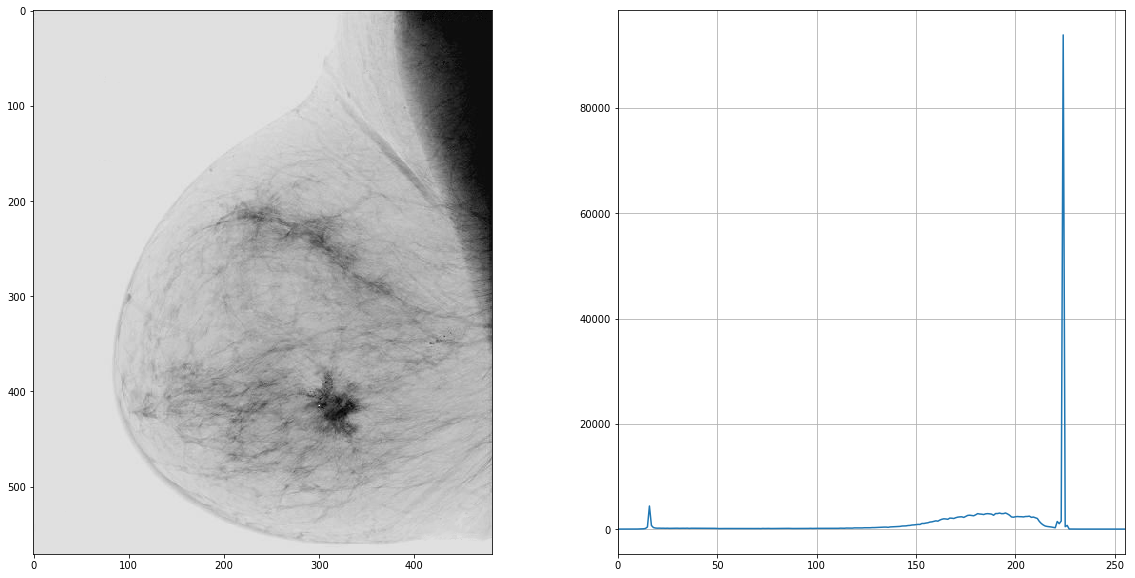

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(neg_img, cmap='gray'); 
plt.subplot(122)
hist = cv2.calcHist([neg_img], [0], None, [256], [0, 256])
plt.plot(hist); plt.xlim([0, 255]); plt.grid(); plt.show();
plt.show();

Реалізуємо перетворення в негатив, використовуючи доступ до групи пікселів. Бібліотека NumPy дозволяє виконувати операції над всіма елементами матриці використовуючи синтаксис звичайних арифметичних операцій.

In [8]:
neg_img1 = np.iinfo('uint8').max - 1 - img

Відобразимо вихідне зображення.

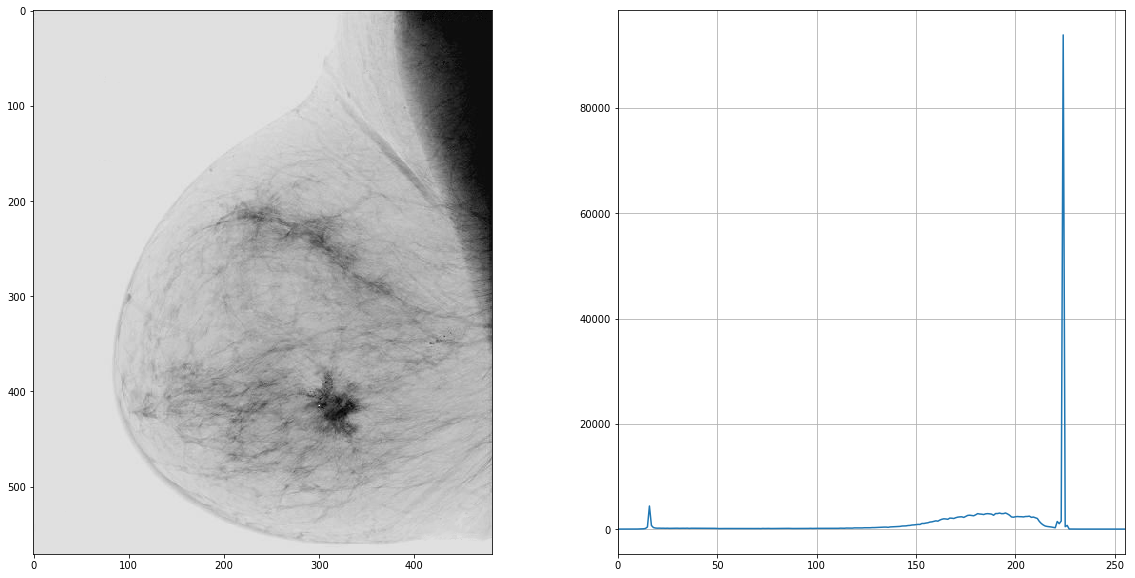

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(neg_img1, cmap='gray'); 
plt.subplot(122)
hist = cv2.calcHist([neg_img1], [0], None, [256], [0, 256])
plt.plot(hist); plt.xlim([0, 255]); plt.grid(); plt.show();
plt.show();

## Зміна контрасту

Зчитаємо та відобразимо вхідне чорно-біле зображення з низьким контрастом, визначимо та відобразимо гістограму вхідного зображення.

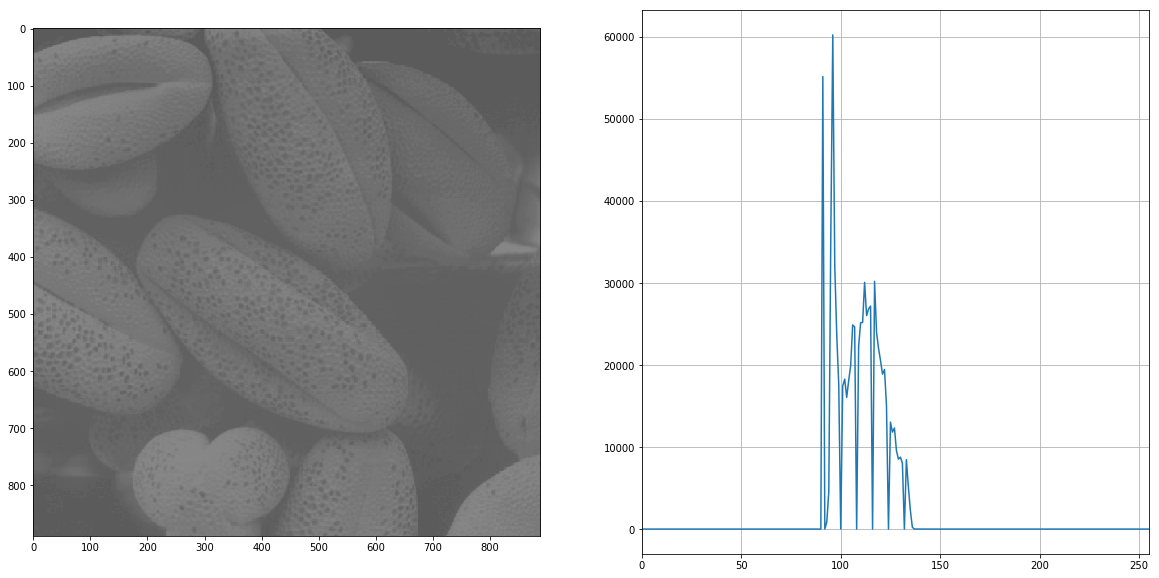

In [10]:
img = cv2.imread('./examples/Fig0310b.tiff', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img, cmap='gray', vmin = 0, vmax = 255); 
plt.subplot(122)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist); plt.xlim([0, 255]); plt.grid(); plt.show();
plt.show();

Визначемо мінімальне та максимальне значення інтенсивності пікселів на вхідному зображенні. Використовуючи ці значення побудуємо графік залежності перетворення інтенсивності вхідного та вихідного зображення.

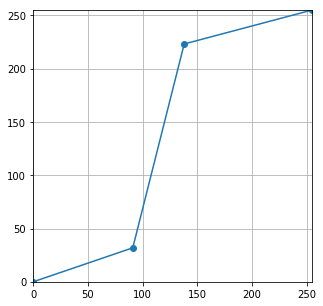

In [11]:
Lmin = np.min(img)
Lmax = np.max(img)
Loutmin = 0
Loutmax = 255

r = [0, Lmin, Lmax, 255]
s = [0, Loutmax/8, Loutmax*7/8, Loutmax]
plt.figure(figsize=(5, 5))
plt.plot(r, s, 'o-')
plt.xlim([0, 255])
plt.ylim([0, 255])
#plt.ylabel('Інтенсивність вихідного зображення, r')
#plt.xlabel('Інтенсивність вхідного зображення, s')

plt.grid()
plt.show()

In [12]:
Loutmax = 255
contr_img_man = np.zeros(img.shape, img.dtype)
alpha = int(((Loutmax * 7/8) - (Loutmax / 8))/ (Lmax - Lmin))
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        contr_img_man[y,x] = alpha*(img[y,x] - Lmin) 

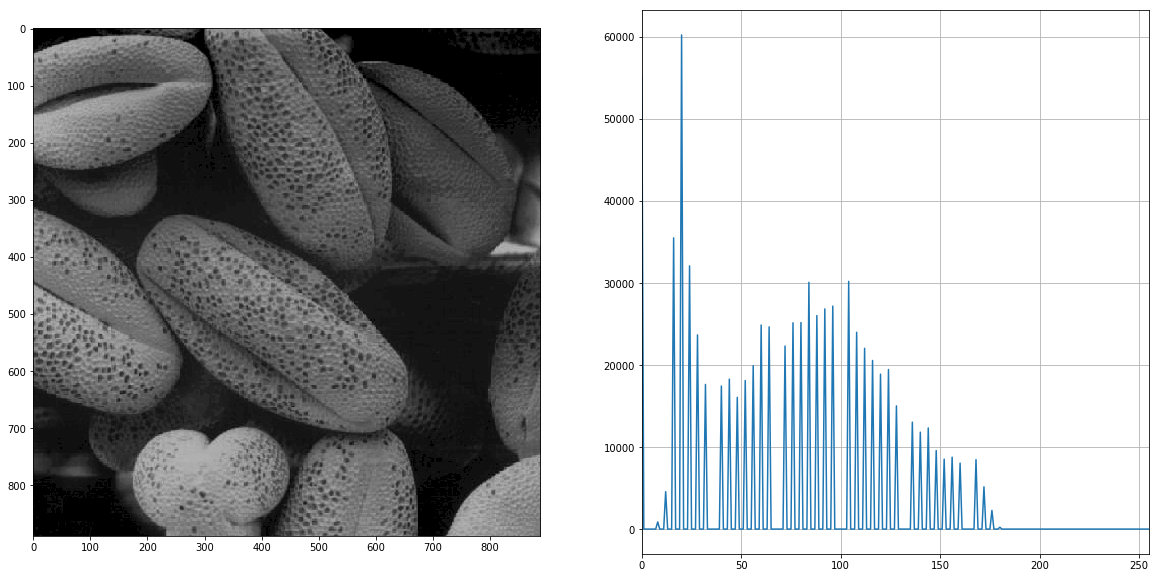

In [13]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(contr_img_man, cmap='gray', vmin = 0, vmax = 255); 
plt.subplot(122)
hist = cv2.calcHist([contr_img_man], [0], None, [256], [0, 256])
plt.plot(hist); plt.xlim([0, 255]); plt.grid(); plt.show();
plt.show();

## Степеневі перетворення

Степеневе перетворення або гама-корекекція зображення визначається наступним виразом::

$$\begin{eqnarray}
s &=& &c&r^\gamma
\end{eqnarray}$$

* с - коефіцієнт підсилення;
* $\gamma$ - показник гама-корекції;
* r - значення інтенсивності піксела вхідного зображення.


Зчитаємо та відобразимо вхідне чорно-біле зображення. Визначимо та відобразимо гістограму вхідного цифрового зображення.

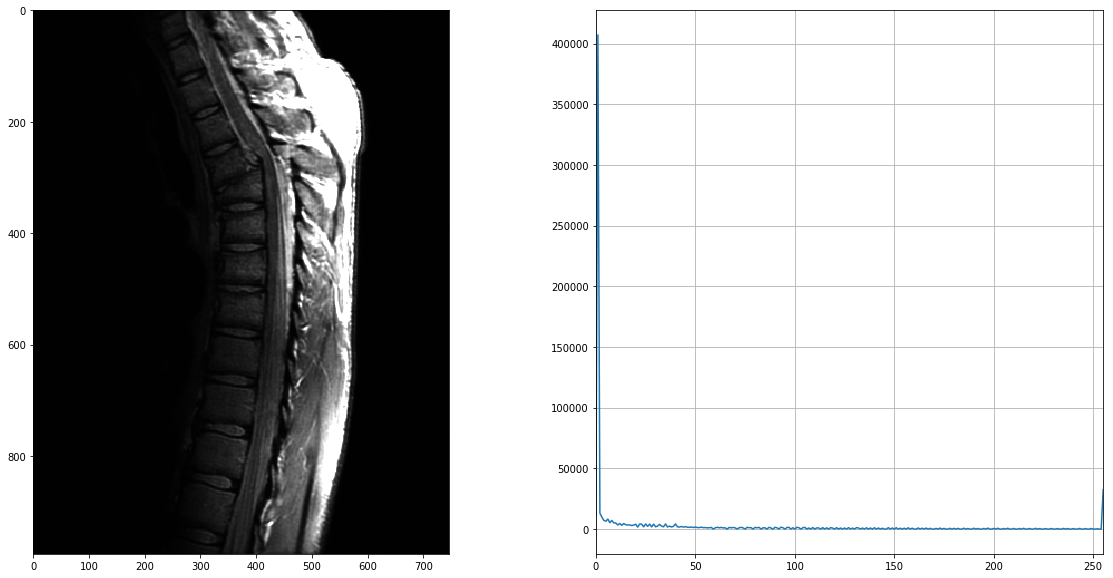

In [14]:
img0308a = cv2.imread("./examples/Fig0308a.tif", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img0308a, cmap='gray', vmin = 0, vmax = 255); 
plt.subplot(122)
hist = cv2.calcHist([img0308a], [0], None, [256], [0, 256])
plt.plot(hist); plt.xlim([0, 255]); plt.grid(); plt.show();
plt.show();

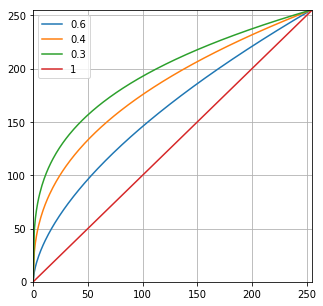

In [15]:
c = 1
gamma1 = 0.6
gamma2 = 0.4
gamma3 = 0.3
gamma4 = 1
s = np.arange(0, 255, 1)

r1 = c * np.power(s, gamma1)
r2 = c * np.power(s, gamma2)
r3 = c * np.power(s, gamma3)
r4 = c * np.power(s, gamma4)

plt.figure(figsize=(5, 5))
plt.plot(s, r1*255/np.max(r1), s, r2*255/np.max(r2), s, r3*255/np.max(r3), s, r4)
plt.grid()
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.legend(['0.6', '0.4', '0.3', '1'])
#plt.ylabel('Інтенсивність вихідного зображення, r')
#plt.xlabel('Інтенсивність вхідного зображення, s')

plt.show()

Відобразимо вихідне зображення після гама-корекції з показником $\gamma_{1}$ = 0.6.

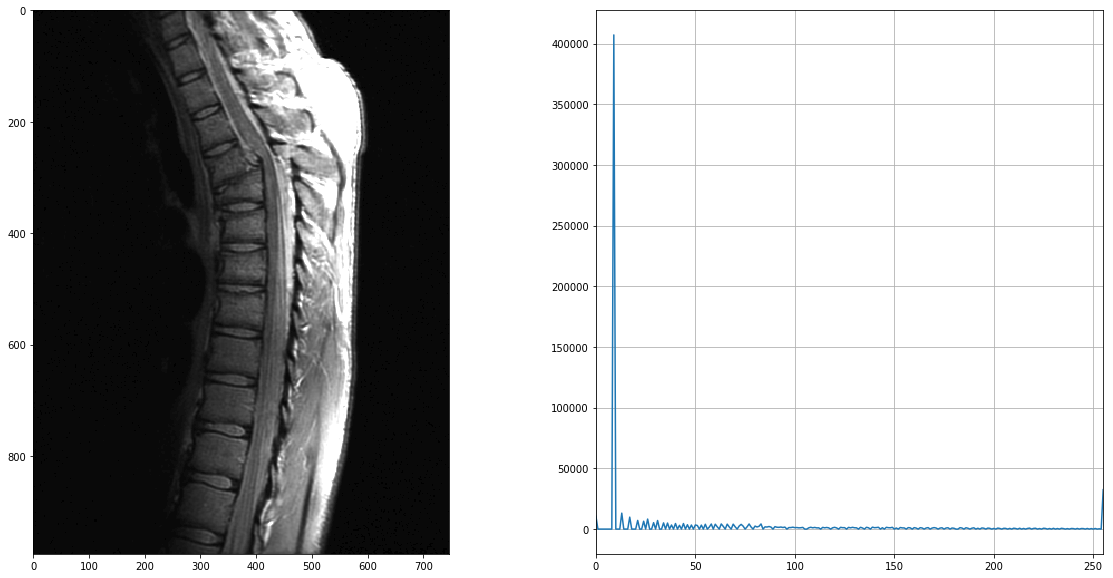

In [16]:
img0308a_1 = c * np.power(img0308a, gamma1)
img0308a_1 = (img0308a_1 / np.max(img0308a_1)*255).astype(np.uint8)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img0308a_1, cmap='gray', vmin = 0, vmax = 255); 
plt.subplot(122)
hist = cv2.calcHist([img0308a_1],[0],None, [256], [0, 256])
plt.plot(hist); plt.xlim([0, 255]); plt.grid(); plt.show();
plt.show();

Відобразимо вихідне зображення після гама-корекції з показником $\gamma_{2}$ = 0.4.

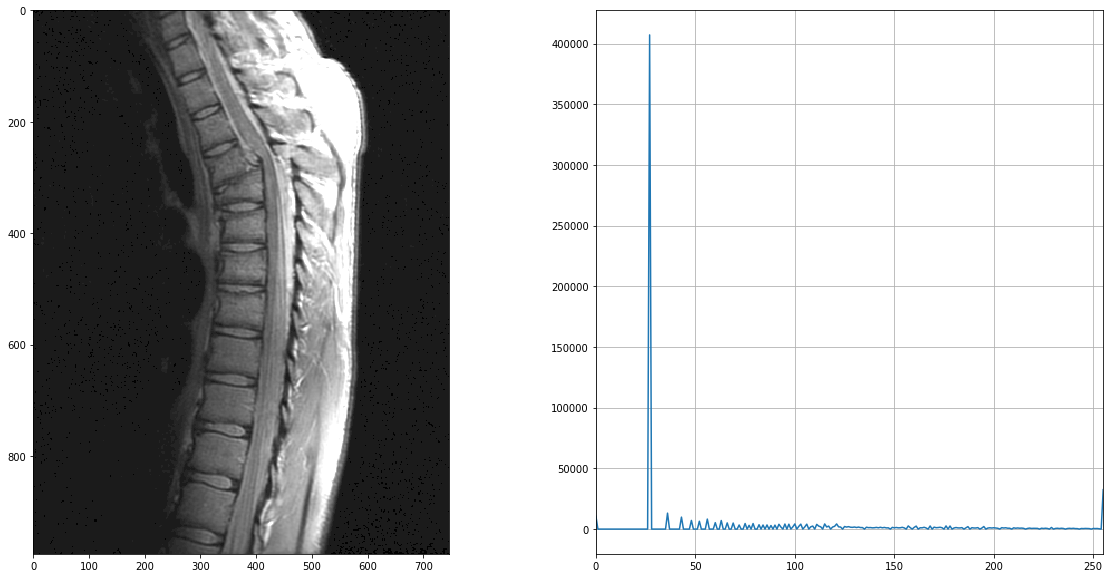

In [17]:
img0308a_2 = c * np.power(img0308a, gamma2)
img0308a_2 = (img0308a_2 / np.max(img0308a_2)*255).astype(np.uint8)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img0308a_2, cmap='gray', vmin = 0, vmax = 255); 
plt.subplot(122)
hist = cv2.calcHist([img0308a_2],[0],None, [256], [0, 256])
plt.plot(hist); plt.xlim([0, 255]); plt.grid(); plt.show();
plt.show();

Відобразимо вихідне зображення після гама-корекції з показником $\gamma_{3}$ = 0.2.

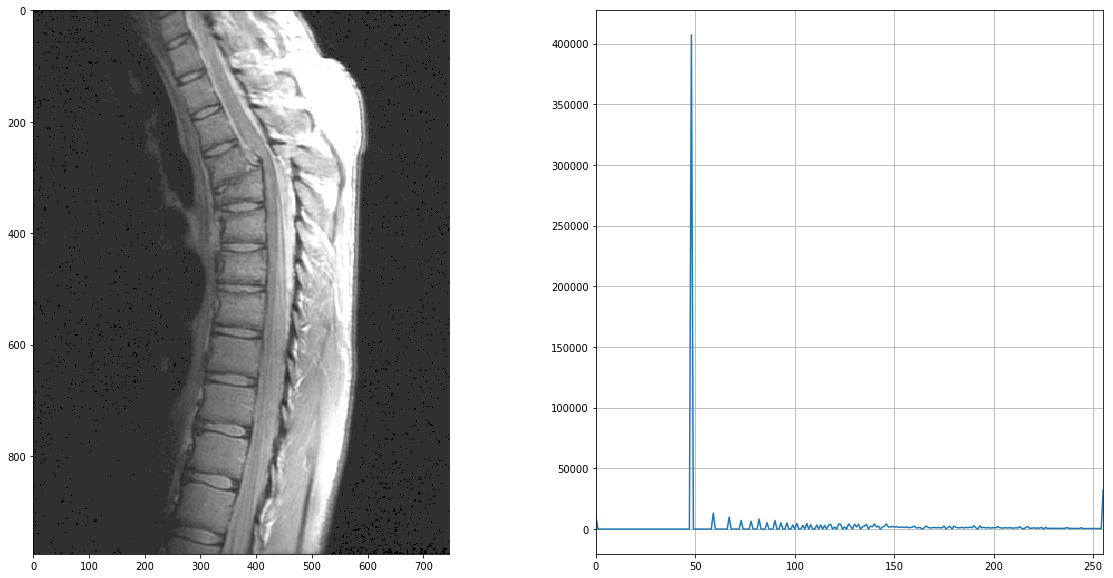

In [18]:
img0308a_3 = c * np.power(img0308a, gamma3)
img0308a_3 = (img0308a_3 / np.max(img0308a_3)*255).astype(np.uint8)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img0308a_3, cmap='gray', vmin = 0, vmax = 255); 
plt.subplot(122)
hist = cv2.calcHist([img0308a_3], [0], None, [256], [0, 256])
plt.plot(hist); plt.xlim([0, 255]); plt.grid(); plt.show();
plt.show();

Для наглядності відобразимо вхдіне зображення $\gamma$ = 1.0 та результат гама-корекції з показниками $\gamma_{1}$ = 0.6, $\gamma_{2}$ = 0.4, $\gamma_{3}$ = 0.2.

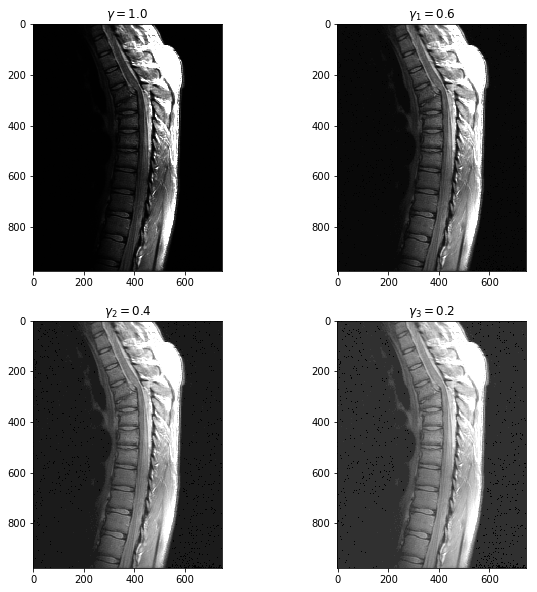

In [38]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title("$\gamma=1.0$")
plt.imshow(img0308a, cmap = 'gray', vmin = 0, vmax = 255); 
plt.subplot(222)
plt.title("$\gamma_{1}=0.6$")
plt.imshow(img0308a_1, cmap='gray', vmin = 0, vmax = 255);
plt.subplot(223)
plt.title("$\gamma_{2}=0.4$")
plt.imshow(img0308a_2, cmap='gray', vmin = 0, vmax = 255); 
plt.subplot(224)
plt.title("$\gamma_{3}=0.2$")
plt.imshow(img0308a_3, cmap='gray', vmin = 0, vmax = 255);
plt.show();

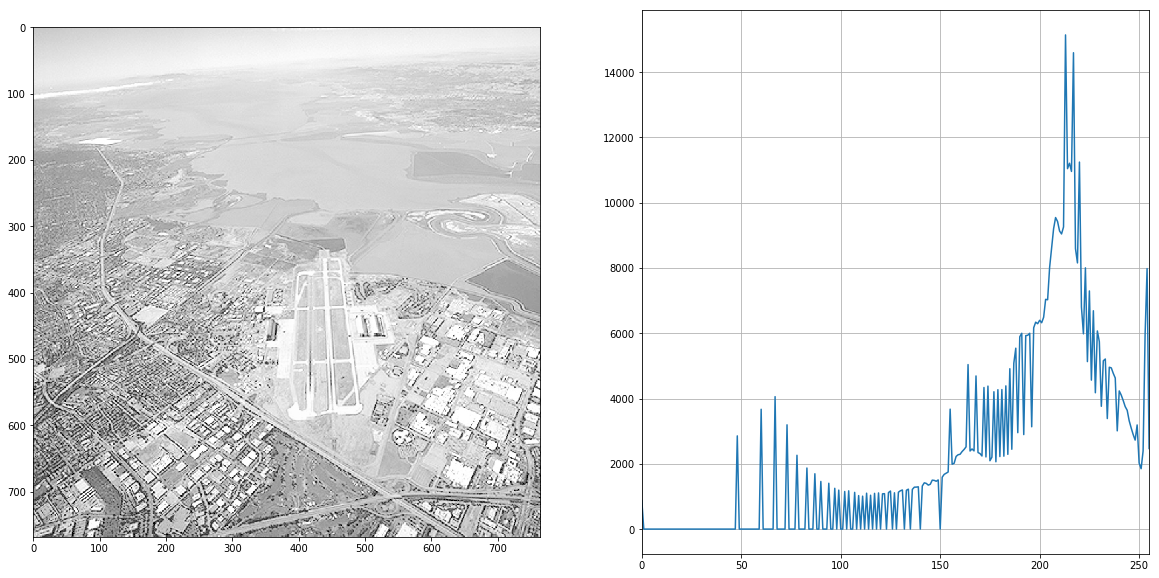

In [31]:
img0309a = cv2.imread("./examples/Fig0309a.tif", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img0309a, cmap = 'gray', vmin=0, vmax=255); 
plt.subplot(122)
hist = cv2.calcHist([img0309a], [0] ,None, [256], [0, 256])
plt.plot(hist); plt.xlim([0, 255]); plt.grid(); plt.show();
plt.show();

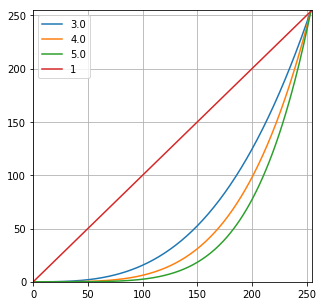

In [32]:
c = 1
gamma1 = 3.0
gamma2 = 4.0
gamma3 = 5.0
gamma4 = 1
s = np.arange(0, 255, 1)

r1 = c * np.power(s, gamma1)
r2 = c * np.power(s, gamma2)
r3 = c * np.power(s, gamma3)
r4 = c * np.power(s, gamma4)

plt.figure(figsize=(5, 5))
plt.plot(s, r1*255/np.max(r1), s, r2*255/np.max(r2), s, r3*255/np.max(r3), s, r4)
plt.grid()
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.legend(['3.0', '4.0', '5.0', '1'])
#plt.ylabel('Інтенсивність вихідного зображення, r')
#plt.xlabel('Інтенсивність вхідного зображення, s')

plt.show()

Відобразимо вихідне зображення після гама-корекції з показником $\gamma_{1}$ = 3.0.

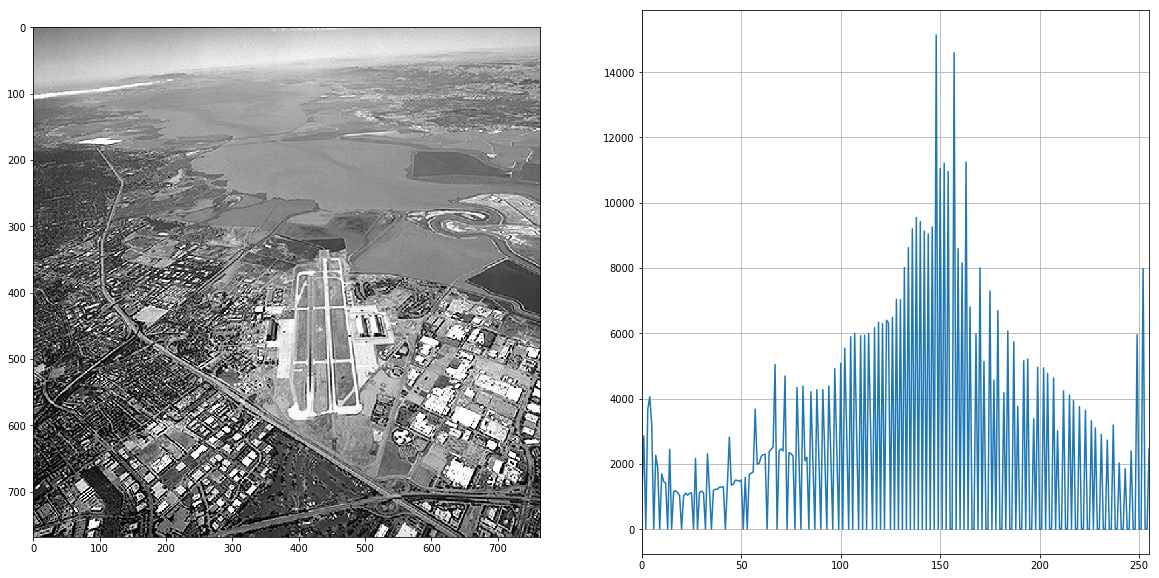

In [33]:
img0309a_1 = c * np.power(img0309a, gamma1)
img0309a_1 = (img0309a_1 / np.max(img0309a_1)*255).astype(np.uint8)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img0309a_1, cmap='gray', vmin = 0, vmax = 255); 
plt.subplot(122)
hist = cv2.calcHist([img0309a_1], [0] ,None, [256], [0, 256])
plt.plot(hist); plt.xlim([0, 255]); plt.grid(); plt.show();
plt.show();

Відобразимо вихідне зображення після гама-корекції з показником $\gamma_{2}$ = 4.0.

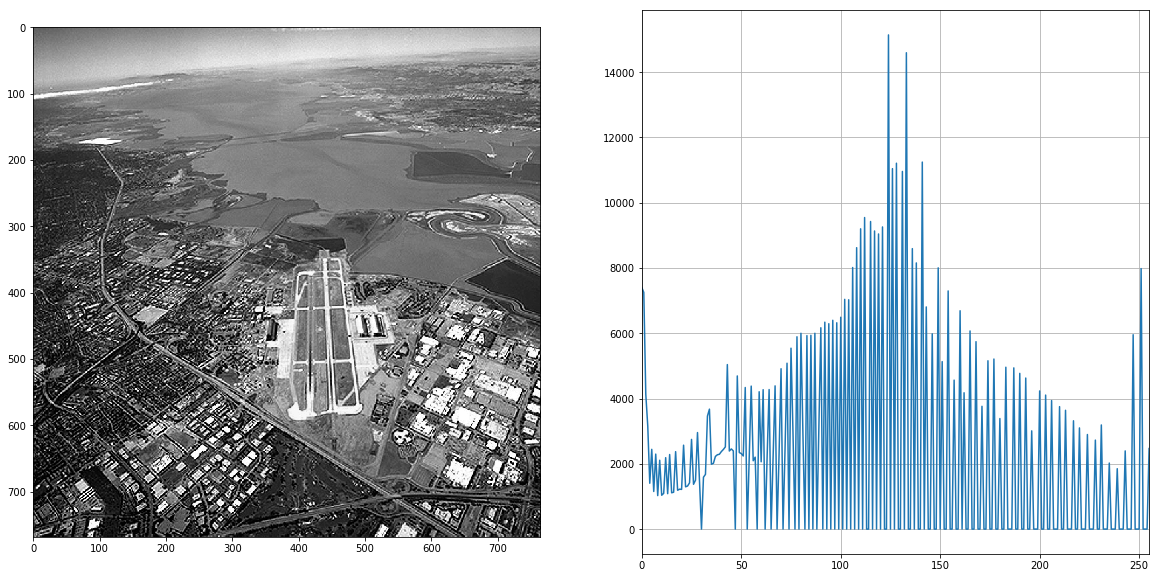

In [34]:
img0309a_2 = c * np.power(img0309a, gamma2)
img0309a_2 = (img0309a_2 / np.max(img0309a_2)*255).astype(np.uint8)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img0309a_2, cmap='gray', vmin = 0, vmax = 255); 
plt.subplot(122)
hist = cv2.calcHist([img0309a_2], [0], None, [256], [0, 256])
plt.plot(hist); plt.xlim([0, 255]); plt.grid(); plt.show();
plt.show();

Відобразимо вихідне зображення після гама-корекції з показником $\gamma_{3}$ = 5.0.

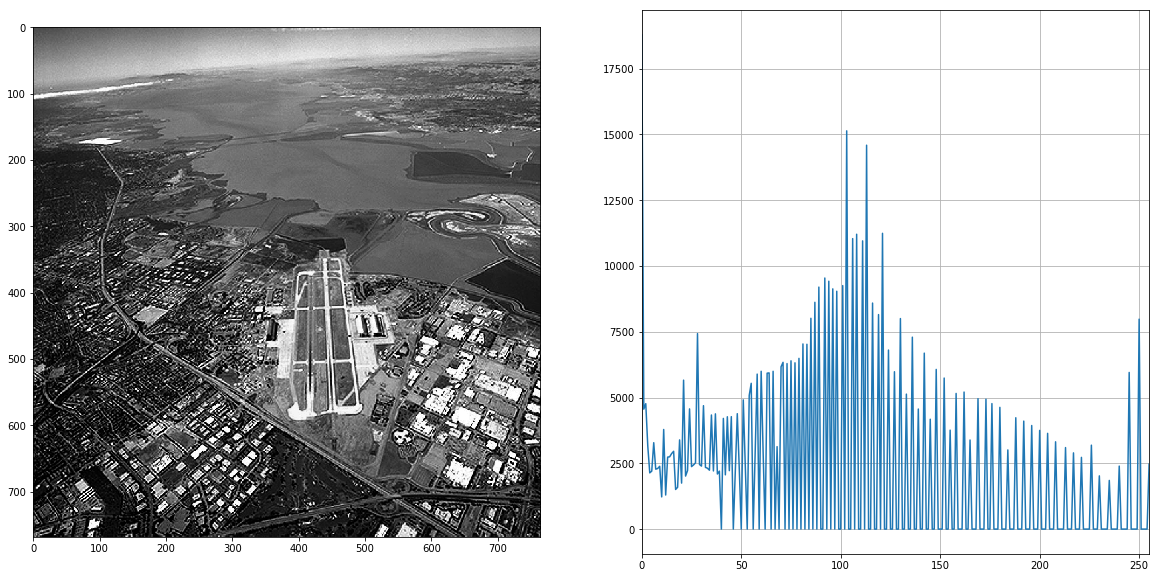

In [35]:
img0309a_3 = c * np.power(img0309a, gamma3)
img0309a_3 = (img0309a_3 / np.max(img0309a_3)*255).astype(np.uint8)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img0309a_3, cmap='gray', vmin = 0, vmax = 255); 
plt.subplot(122)
hist = cv2.calcHist([img0309a_3], [0], None, [256], [0, 256])
plt.plot(hist); plt.xlim([0, 255]); plt.grid(); plt.show();
plt.show();

Для наглядності відобразимо вхдіне зображення $\gamma$ = 1.0 та результат гама-корекції з показниками $\gamma_{1}$ = 3.0, $\gamma_{2}$ = 4.0, $\gamma_{3}$ = 5.0.

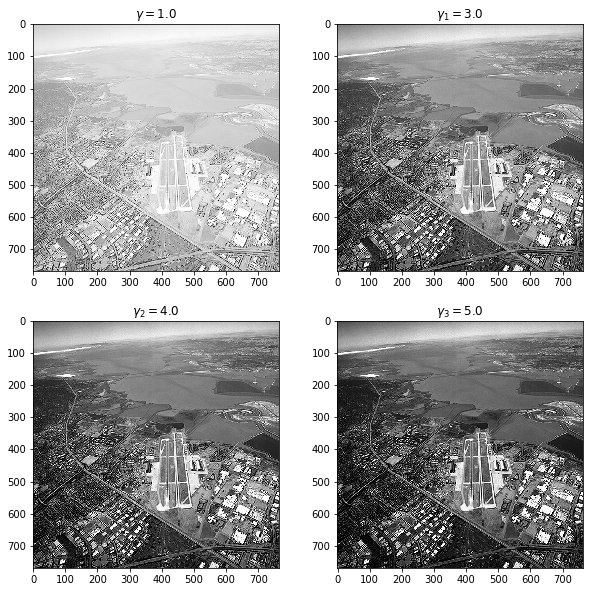

In [40]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title("$\gamma=1.0$")
plt.imshow(img0309a, cmap = 'gray'); 
plt.subplot(222)
plt.title("$\gamma_{1}=3.0$")
plt.imshow(img0309a_1, cmap='gray');
plt.subplot(223)
plt.title("$\gamma_{2}=4.0$")
plt.imshow(img0309a_2, cmap='gray'); 
plt.subplot(224)
plt.title("$\gamma_{3}=5.0$")
plt.imshow(img0309a_3, cmap='gray');
plt.show();

## Еквалізація гістограми

Для екавлізації гістограми цифрового зображення використовується функція **equalizeHist**.

### Синтаксис функції
    dst = cv2.equalizeHist(src)
Параметри:
* **src** - вхідне зображення.

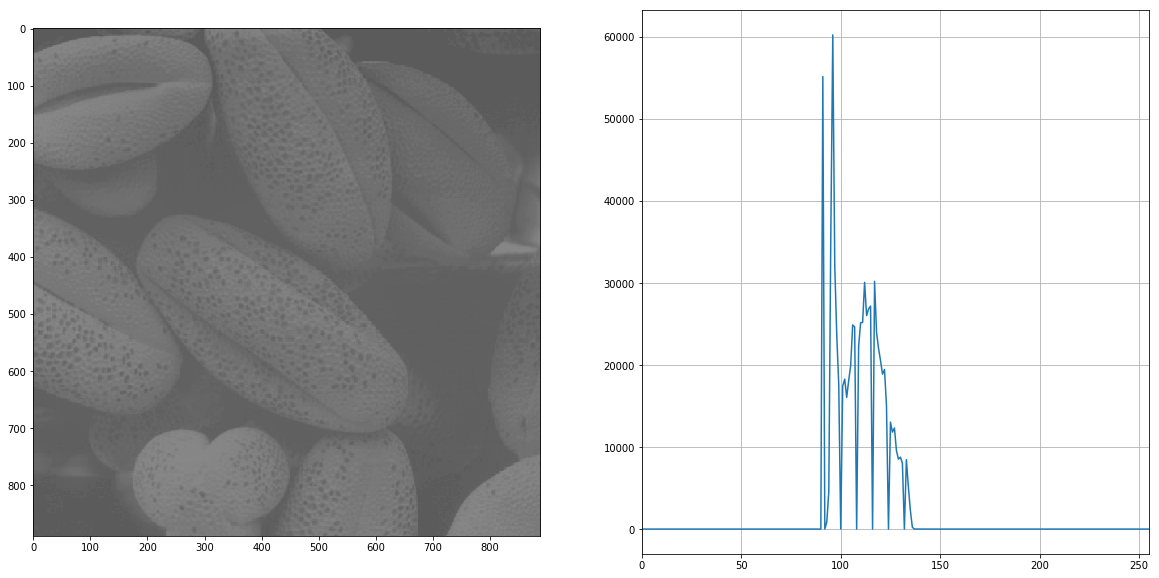

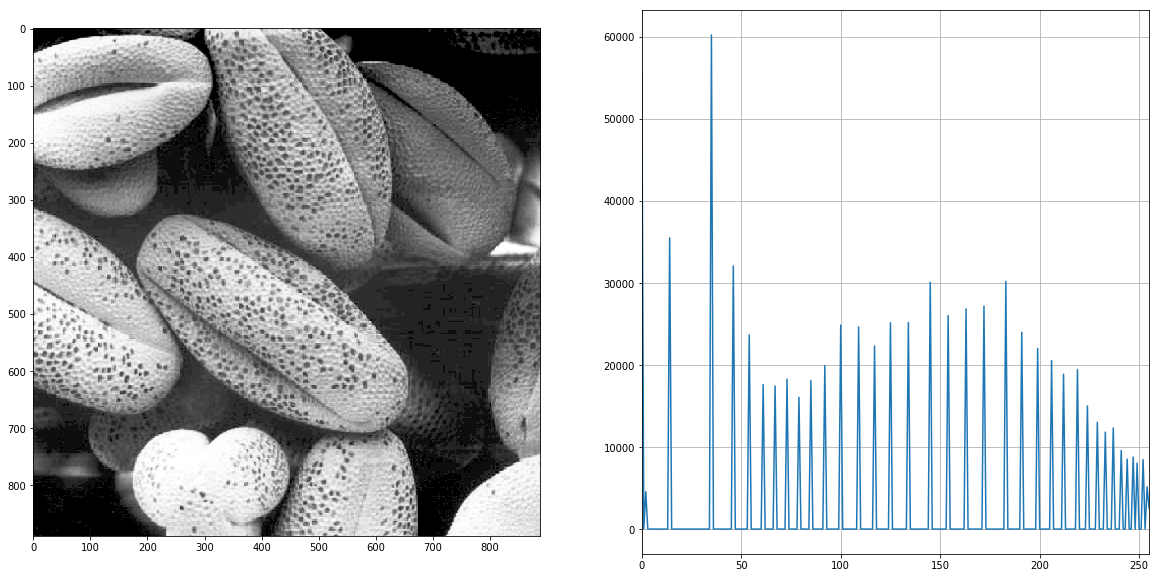

In [42]:
img0310b = cv2.imread('./examples/Fig0310b.tiff', 0)

equ = cv2.equalizeHist(img)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img0310b, cmap='gray', vmin = 0, vmax = 255); 
plt.subplot(122)
hist = cv2.calcHist([img0310b], [0], None, [256], [0, 256])
plt.plot(hist); plt.xlim([0, 255]); plt.grid(); plt.show();
plt.show();

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(equ, cmap='gray', vmin = 0, vmax = 255); 
plt.subplot(122)
hist = cv2.calcHist([equ], [0], None, [256], [0, 256])
plt.plot(hist); plt.xlim([0, 255]); plt.grid(); plt.show();
plt.show();